In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go



In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

## Data Exploration

In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Descriptive Analysis

In [5]:
df.shape

(400, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df[df.duplicated()].shape

(0, 11)

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [9]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

### The features are not on the same scale. For example Population has a mean of 264.84 and Advertising has a mean value of 6.63. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

## Feature Engineering

In [10]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

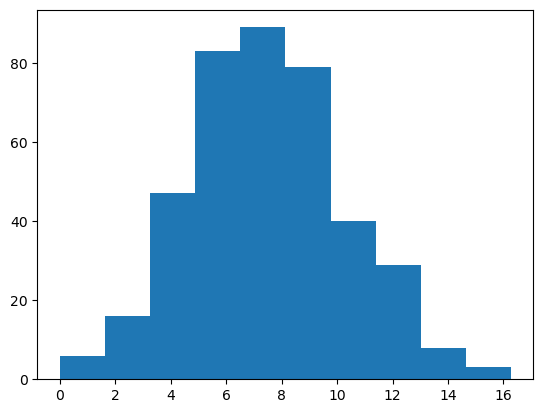

In [11]:
plt.hist('Sales',data=df)
plt.show()

### As we  can see the it is a normal distribution so we can take mean or median as a threshold to make two or three categories'Low','Medium','High'

### For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”

In [12]:
df.Sales.max()

16.27

In [13]:
16.27/3

5.423333333333333

In [14]:
5.423*3

16.269

In [15]:
df1 = df.copy()
df1['Sales_cat'] = pd.cut(x=df1['Sales'],bins=[0,5.39,9.32,17], labels = ['low', 'Medium','High'],right =False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       low

In [16]:
df1.Sales_cat.value_counts()

Medium    198
High      102
low       100
Name: Sales_cat, dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [18]:
cat_features = df1.describe(include=['object','category']).columns
cat_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [19]:
num_features = df1.describe(include=['int64','float64']).columns
num_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

## Data Visualization

### Univariate Plots

C:\Users\Awadhesh pal\AppData\Local\Temp\ipykernel_19620\245826108.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat],kde = False,label='skew = %.3f'%(skew),bins = 30)


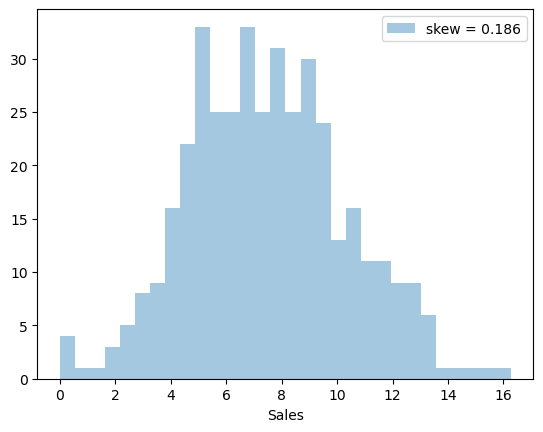

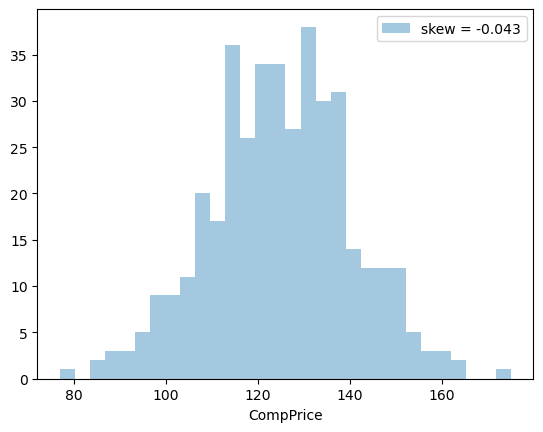

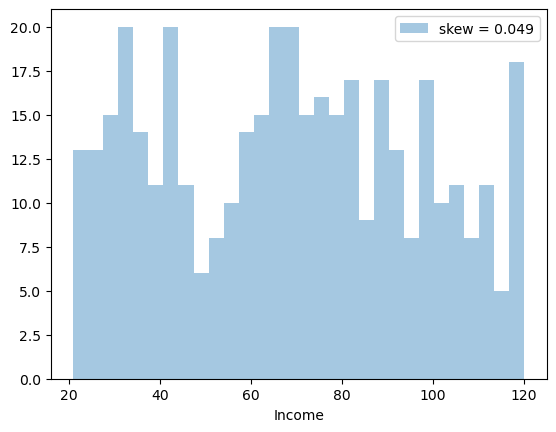

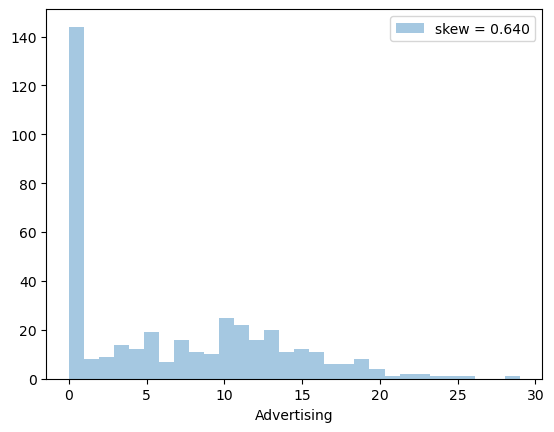

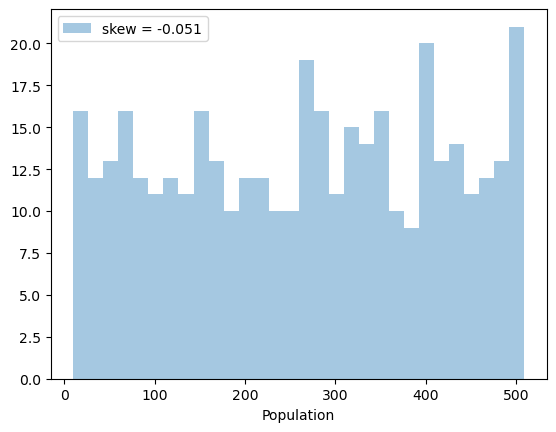

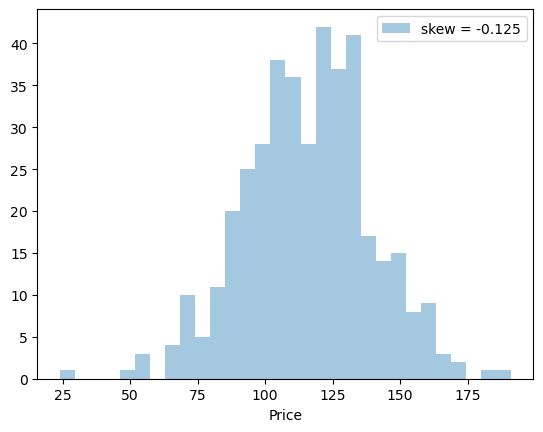

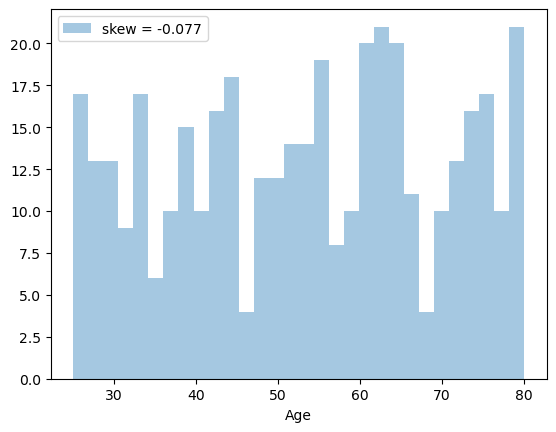

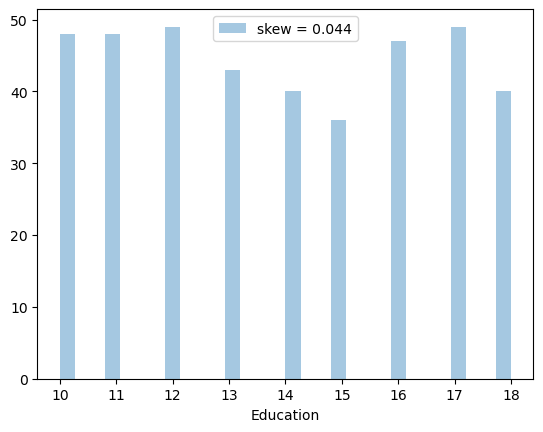

In [20]:
num_feat =  [feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in num_features:
    skew = df[feat].skew()
    sns.distplot(df[feat],kde = False,label='skew = %.3f'%(skew),bins = 30)
    plt.legend(loc='best')
    plt.show()

In [21]:
num_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

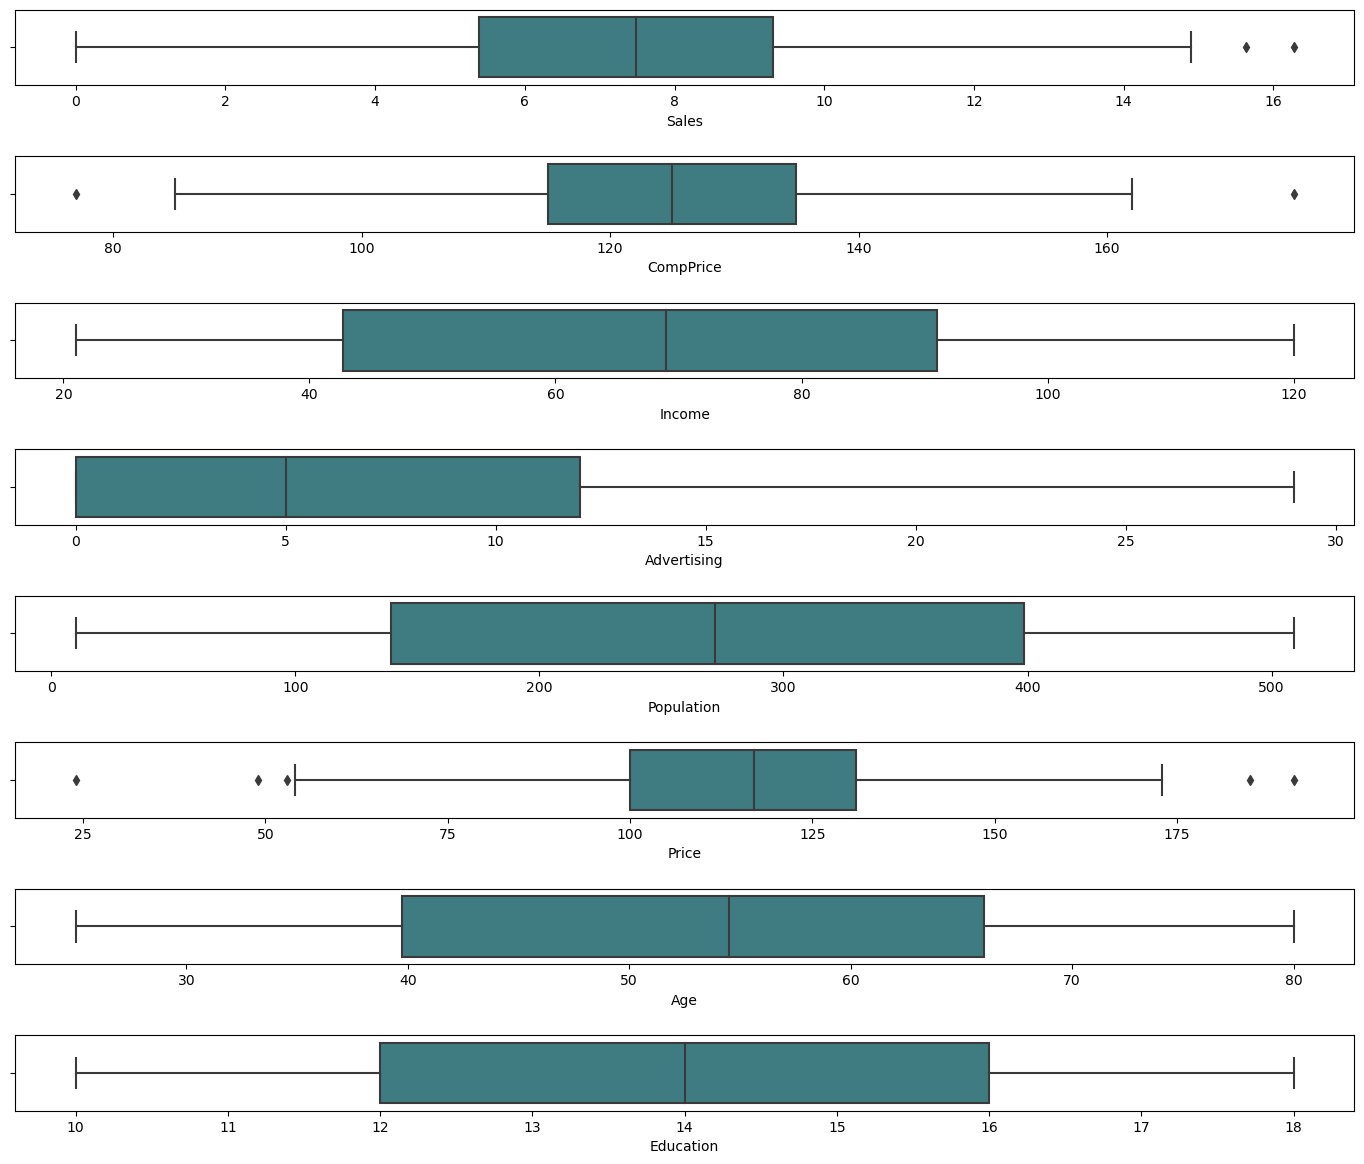

In [22]:
ot = df.copy()
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

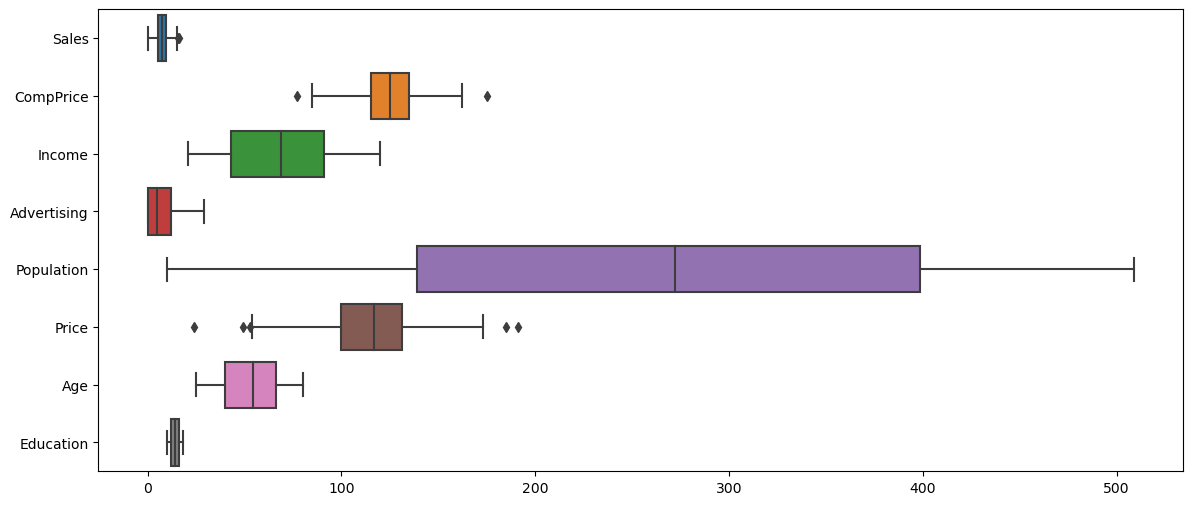

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[num_features],orient='h')

## Multivariate Analysis

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507:

C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `p

<Figure size 800x800 with 0 Axes>

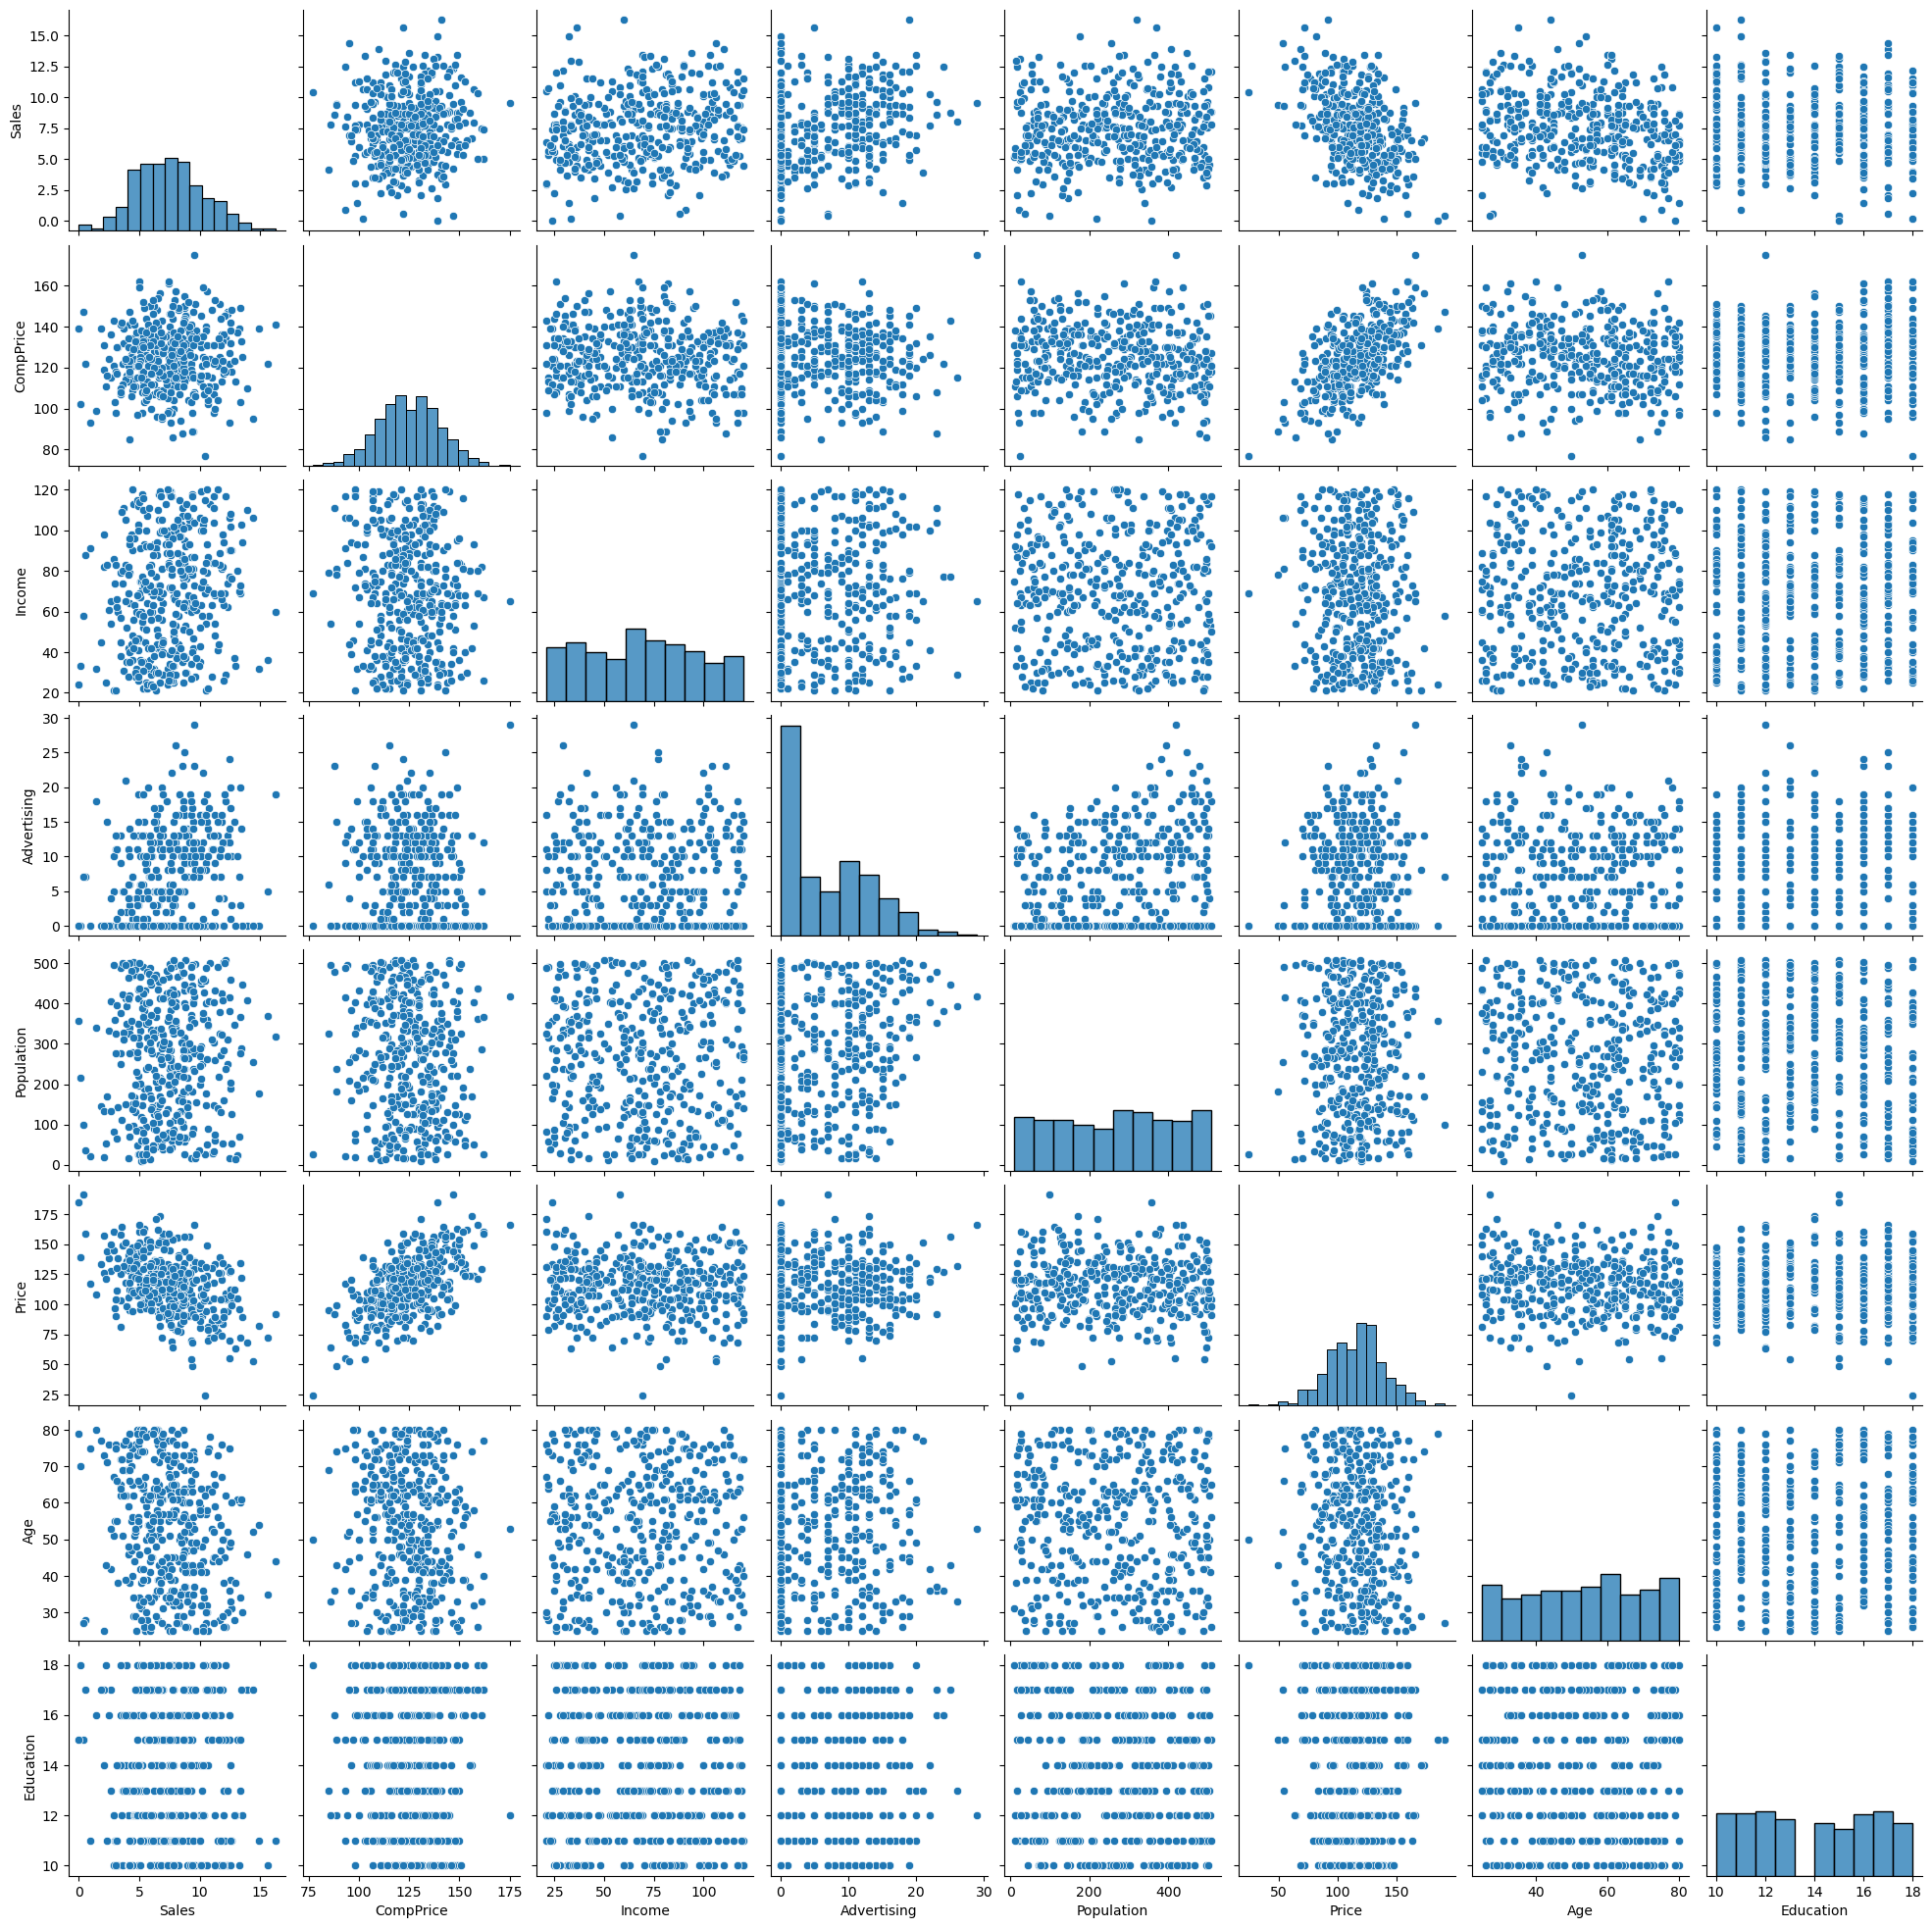

In [24]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='coolwarm')
plt.show()

C:\Users\Awadhesh pal\AppData\Local\Temp\ipykernel_19620\2167590755.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


<Axes: >

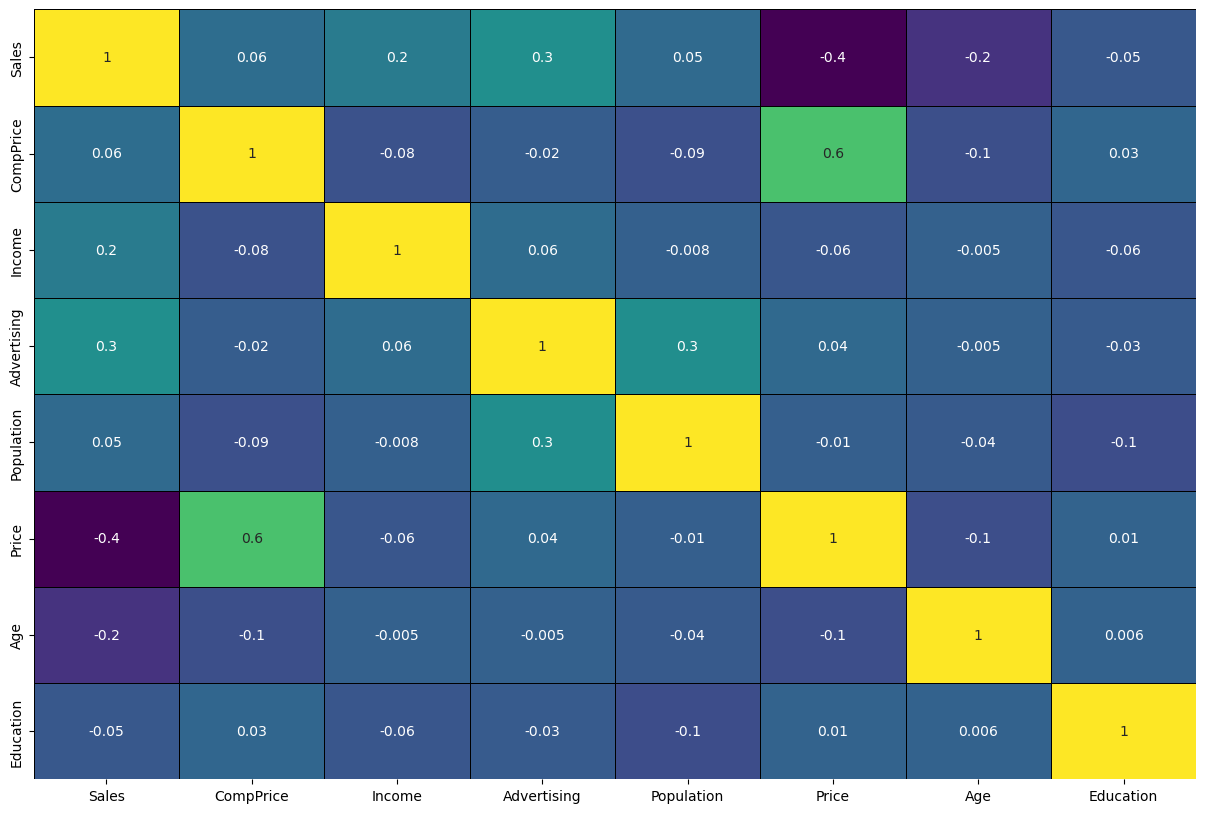

In [25]:
# correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


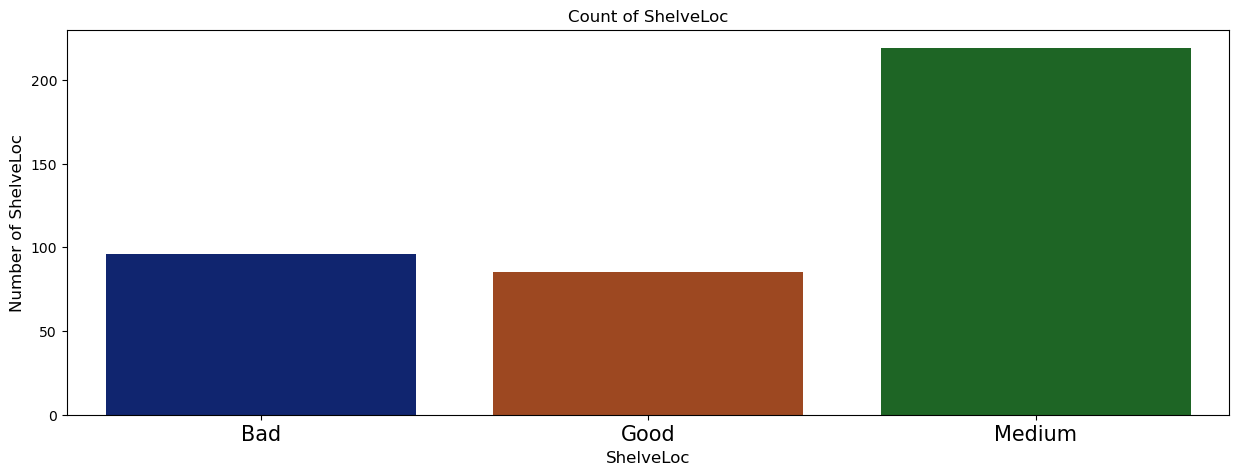

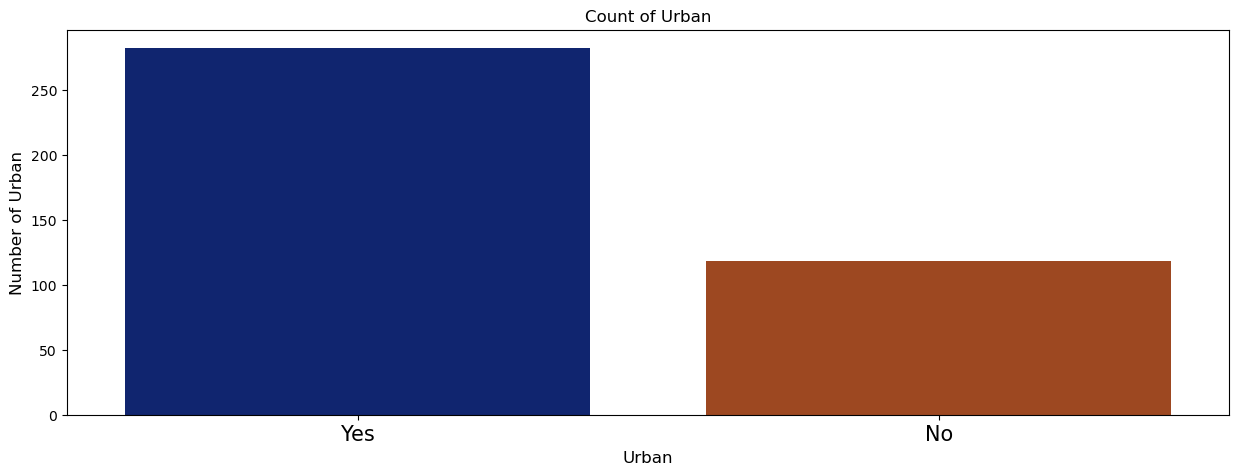

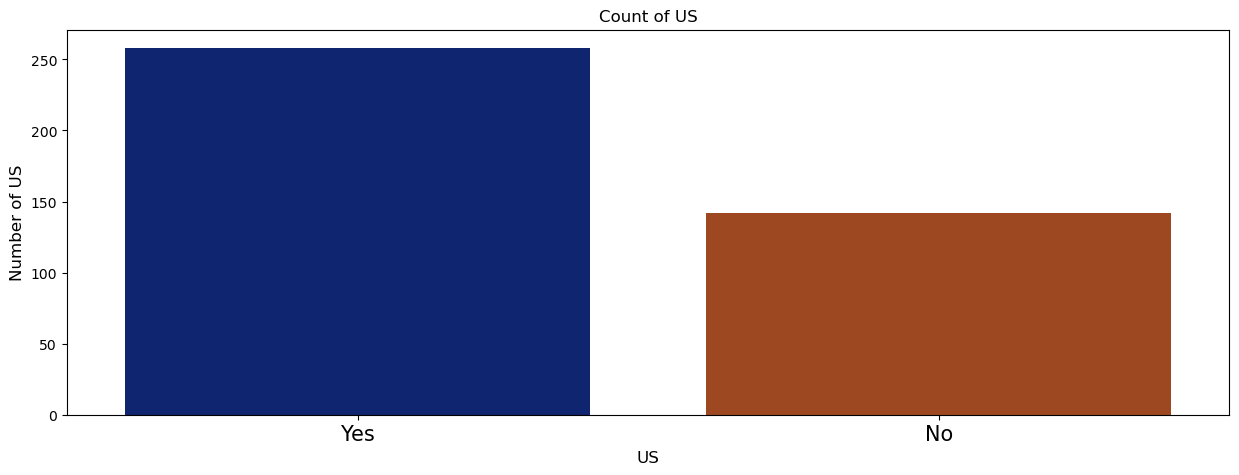

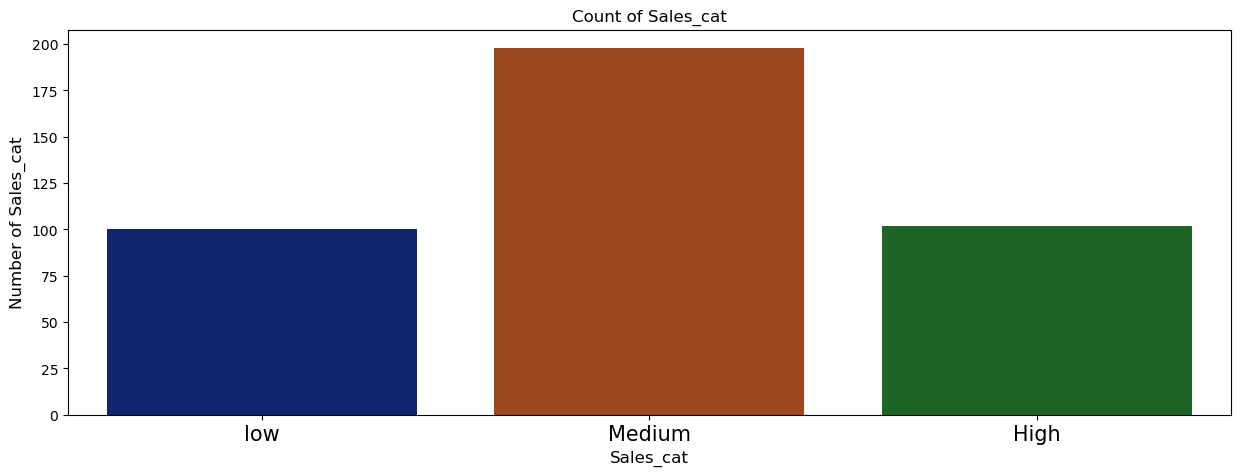

In [26]:
print(cat_features)
for idx,column in enumerate(cat_features):
     plt.figure(figsize=(15, 5))
     unique = df1[column].value_counts(ascending=True);
  #plt.subplot(1, len(categorical_features), idx+1)    
     plt.title("Count of "+ column)
     sns.countplot(data=df1, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
     plt.xticks(rotation = 0, size = 15)
    
     plt.xlabel(column, fontsize=12)
     plt.ylabel("Number of "+ column, fontsize=12) 

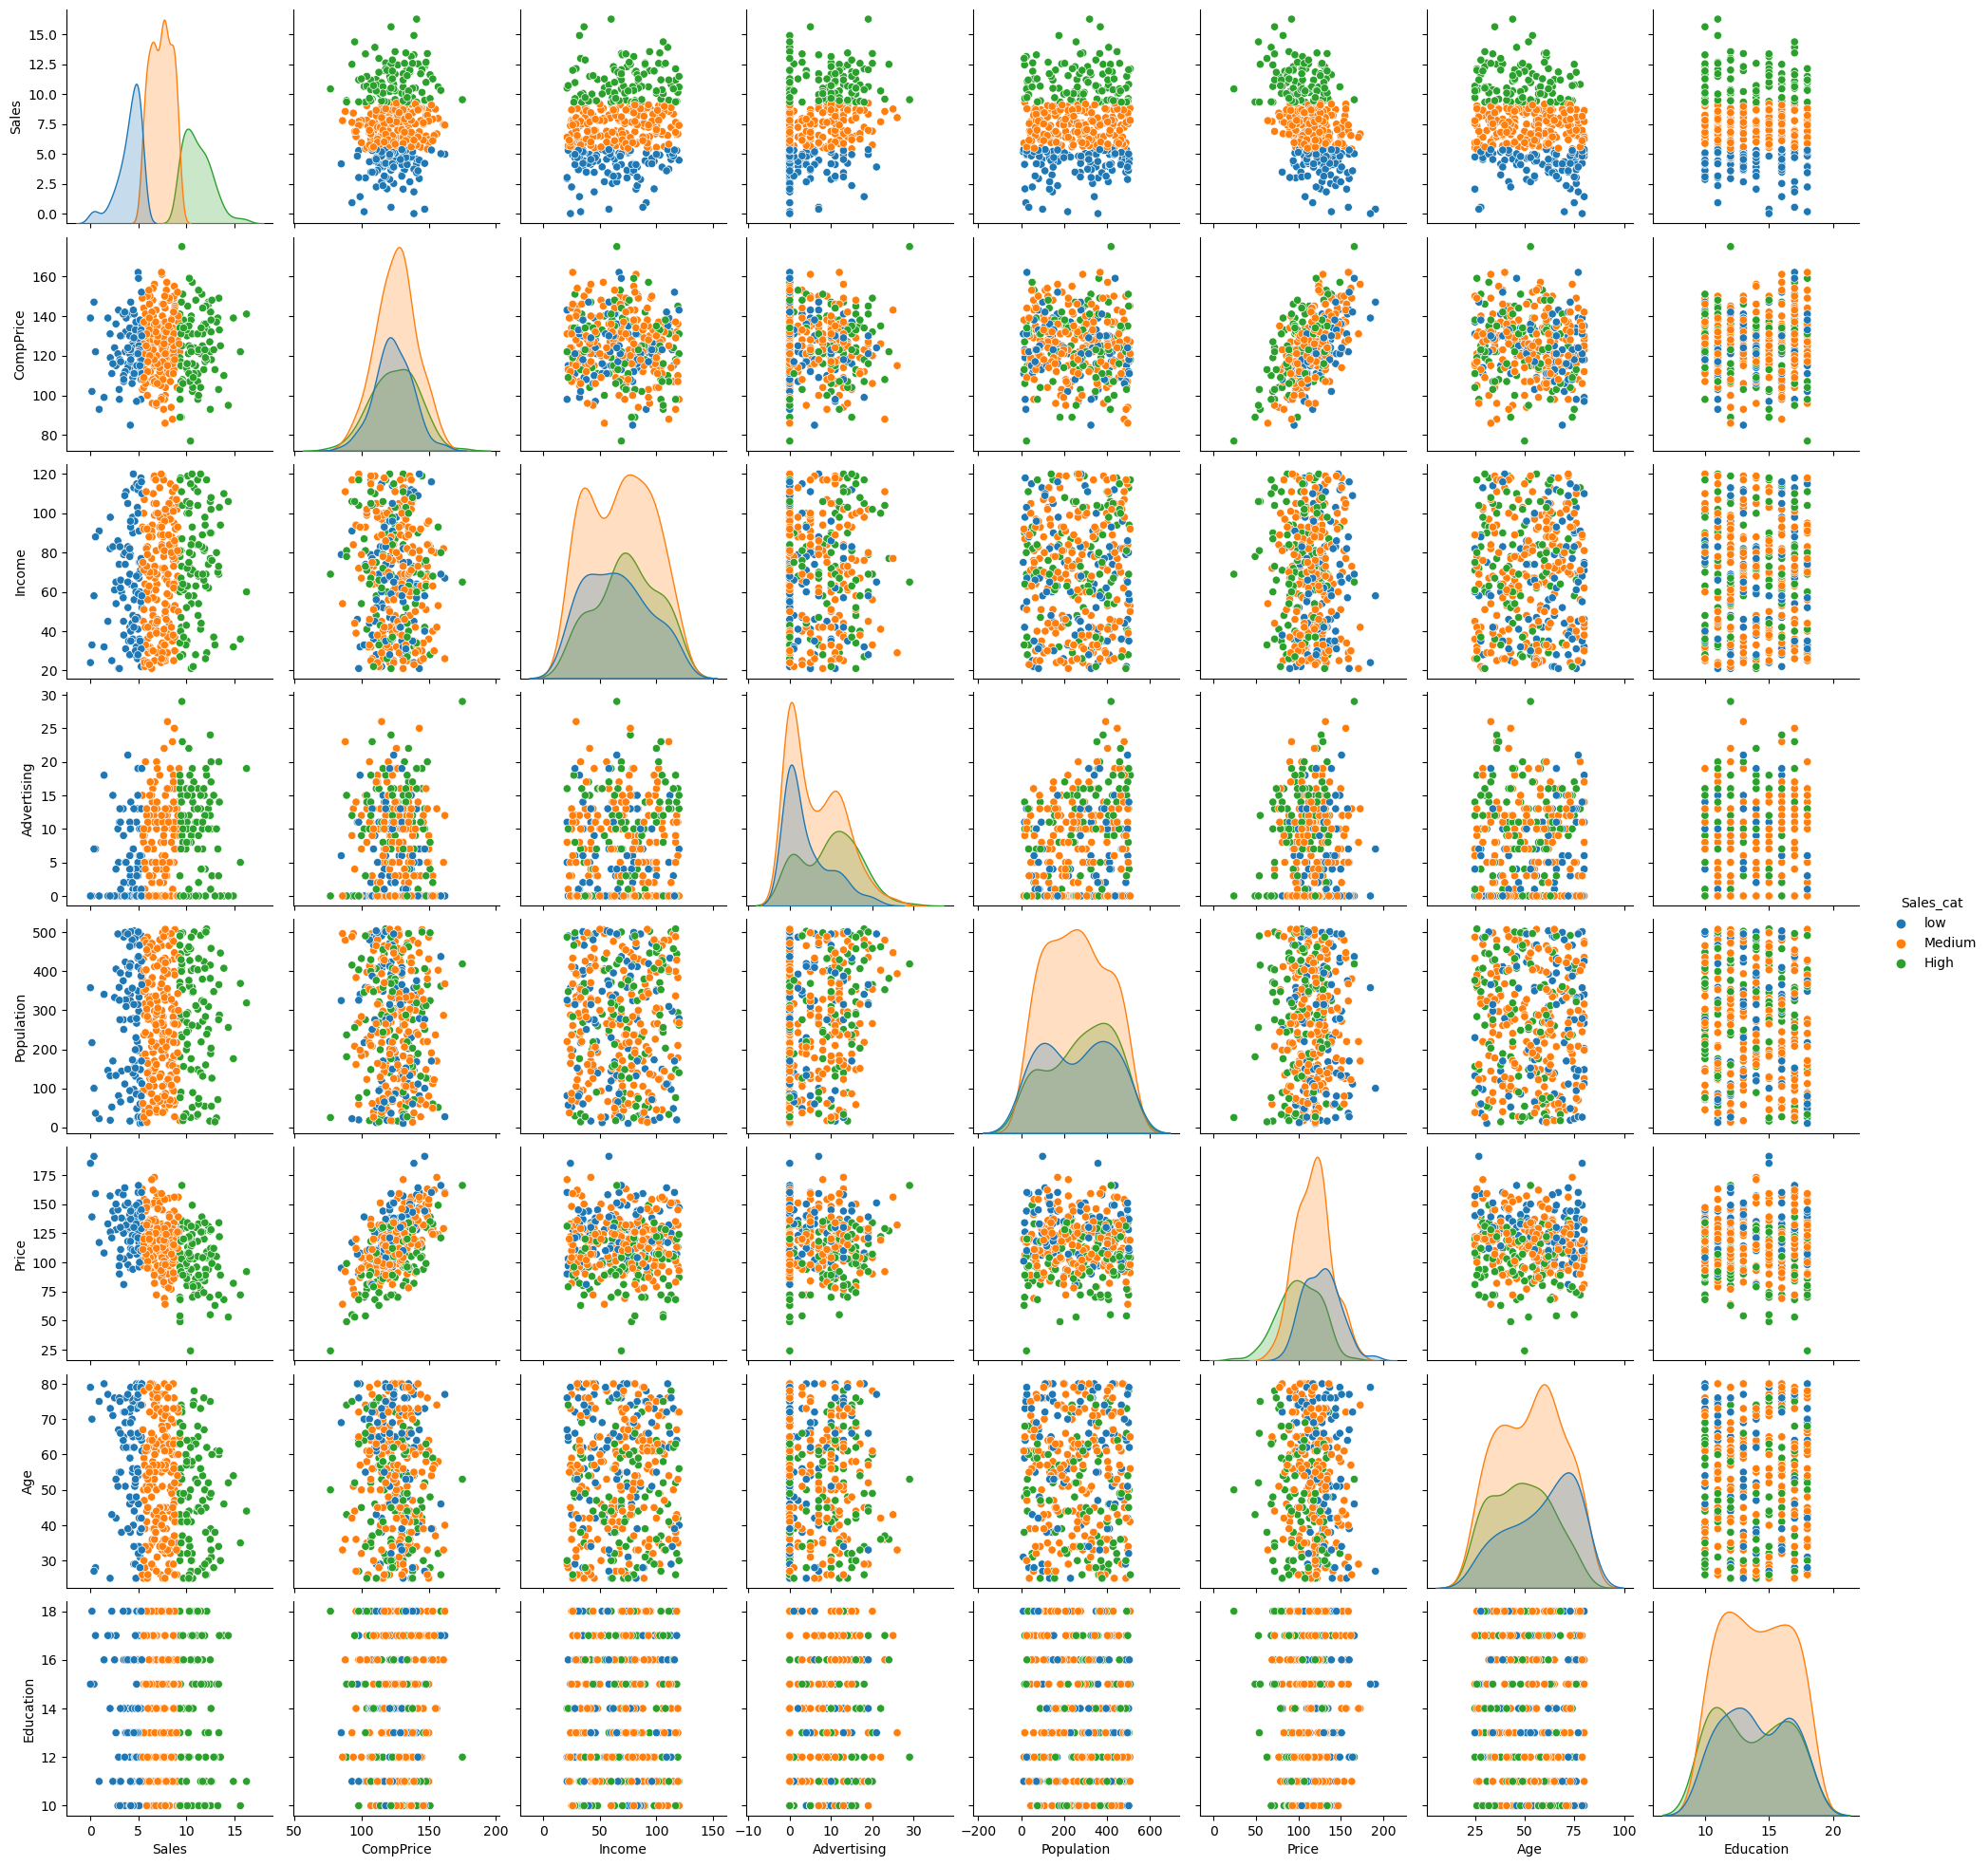

In [27]:
import seaborn as sns
sns.pairplot(data=df1, hue ='Sales_cat')

In [28]:
data1 = df1.copy()
data1.drop('Sales',axis=1, inplace = True)
data1= pd.get_dummies(data1.iloc[:,:-1])
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

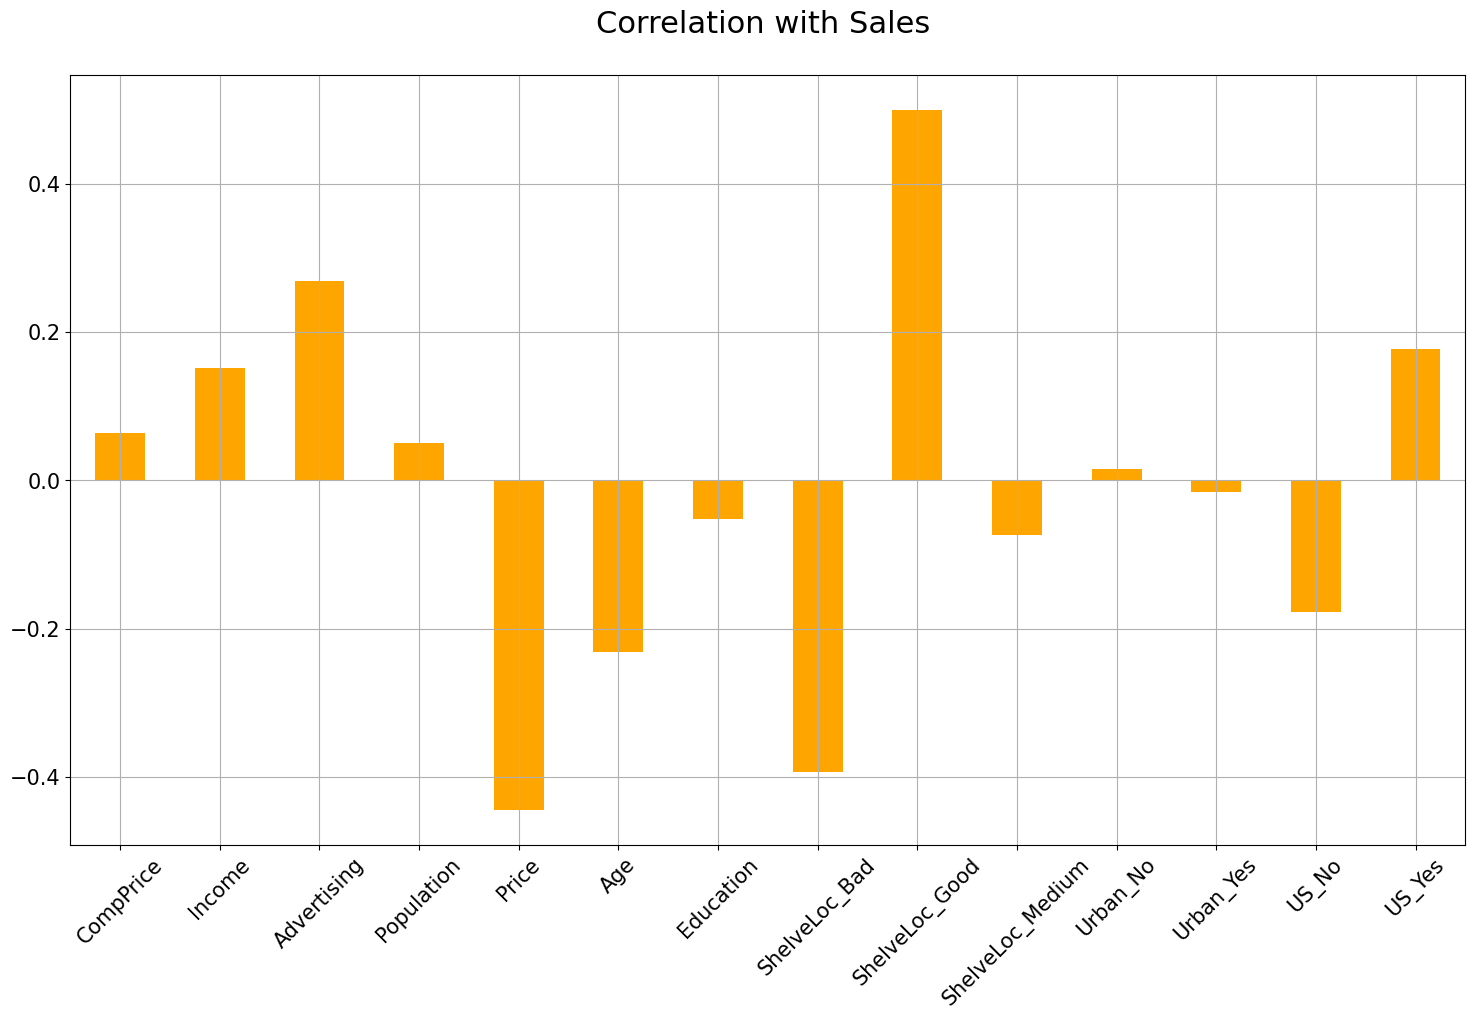

In [29]:
data2 = data1.copy()

correlation = data2.corrwith(df1.Sales)
correlation = correlation[correlation!=1]
positive_correlation = correlation[correlation >0].sort_values(ascending = False)
negative_correlations =correlation[correlation<0].sort_values(ascending = False)

correlation.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

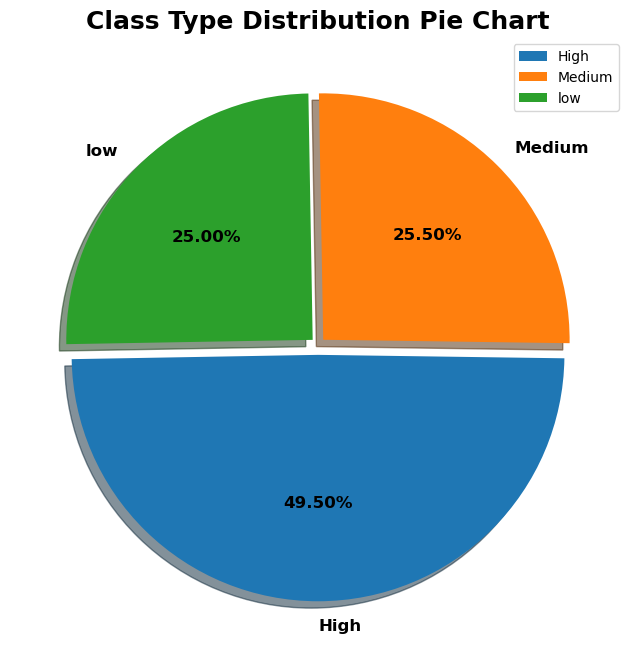

In [30]:
## Checking for Imbalanced or balanced dataset with regards to the target
plt.figure(figsize=(12,8))
plt.pie(df1['Sales_cat'].value_counts(),
       labels=df1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

#### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [31]:
df1.Sales_cat.value_counts()

Medium    198
High      102
low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

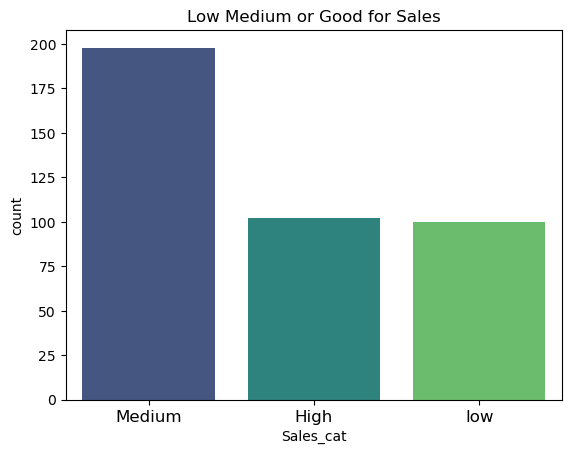

In [32]:
sns.countplot(x='Sales_cat', data=df1, palette = 'viridis', 
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

## Feature Selection Technique

###  Data Pre-Processing

In [33]:
data1= df1.copy()
data1.drop('Sales',axis =1,inplace=True)
data1 = pd.get_dummies(data1.iloc[:,:-1])
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [34]:
data1['Sales'] = df1.Sales_cat
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     low

In [35]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [36]:
le = LabelEncoder()
le.fit(data1['Sales'])
data1['Sales']=le.transform(data1['Sales'])
data1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      1  
4      1       0      2

In [37]:
# Spliting into X and Y 
X= data1.iloc[:,:-1]

y=data1.Sales

In [38]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,chi2

In [39]:
test = SelectKBest(score_func=chi2,k=4)
fit = test.fit(X,y)

In [40]:
scores = fit.scores_
features = fit.transform(X)

In [41]:
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                      columns=['Score','Feature'])
score_df.sort_values(by='Score',ascending=False,inplace=True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

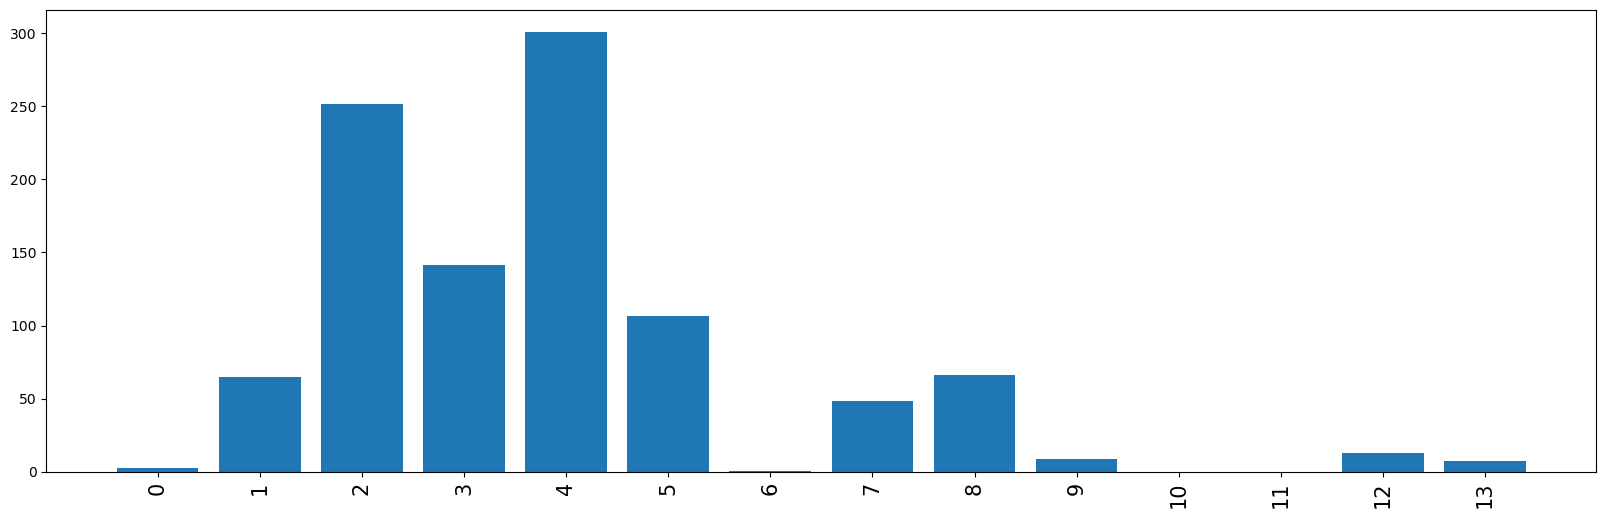

In [42]:
fig,axes = plt.subplots(figsize=(20,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.xticks(rotation = 90,size = 15)
plt.show()

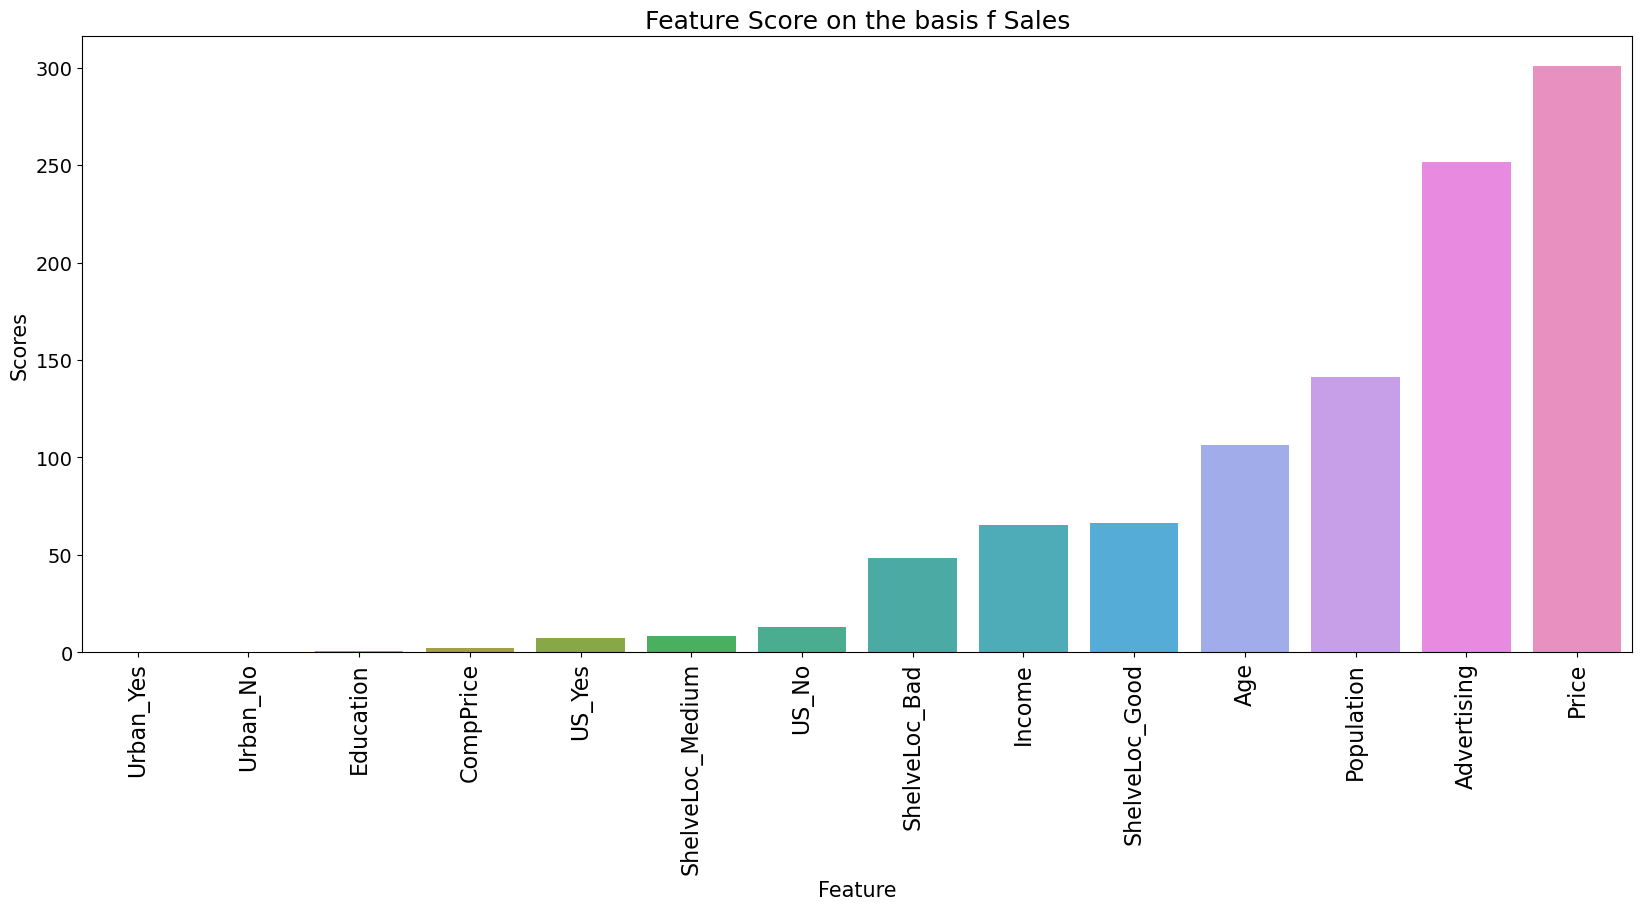

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',
           y='Score',
           data=score_df,
           order=score_df.sort_values('Score').Feature)
plt.xlabel('Feature',size = 15)
plt.ylabel('Scores',size=15)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation = 90,fontsize=16)
plt.title('Feature Score on the basis f Sales',size=18)
plt.show()

In [45]:
model_data = data1[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      1  
4                 0      2

In [46]:
x= model_data.drop('Sales',axis=1)
y= model_data['Sales']

In [48]:
y.unique()

array([0, 1, 2])

In [49]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [51]:
from collections import Counter  

In [56]:
# Create StratifiedKfold object
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for train_ix,test_ix in skf.split(x,y):
    train_X,test_X=x.iloc[train_ix],x.iloc[test_ix]
    train_y,test_y = y.iloc[train_ix],y.iloc[test_ix]
    counter_train = Counter(train_y)
    counter_test = Counter(test_y)
    print('Trianing Data',counter_train,'Testing Data',counter_test)
    

Trianing Data Counter({1: 179, 0: 91, 2: 90}) Testing Data Counter({1: 19, 0: 11, 2: 10})
Trianing Data Counter({1: 179, 0: 91, 2: 90}) Testing Data Counter({1: 19, 0: 11, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 2: 10, 0: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})
Trianing Data Counter({1: 178, 0: 92, 2: 90}) Testing Data Counter({1: 20, 0: 10, 2: 10})


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify = y)

In [58]:
counter_train = Counter(y_train)
conter_test = Counter(y_test)
print('Traning Data',counter_train,'Testing Data',counter_test)



Traning Data Counter({1: 139, 0: 71, 2: 70}) Testing Data Counter({1: 20, 0: 10, 2: 10})


In [59]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Grid search using Stratified Kfold Splits

In [89]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score

In [90]:
def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print('Train Result:\n')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
        print(' ')
        print(f'Classification Report:\n{clf_report}')
        print(' ')
        print(f'Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n')
        
    elif train==False:
            pred =clf.predict(X_test)
            clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict= True))
            print('Test Result:\n')
            print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
            print(' ')
            print(f'Classification Report:\n{clf_report}')
            print(' ')
            print(f'Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n')
        
        
        

In [91]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [92]:
params ={
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1, 20))),
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':list(range(1, 20)),
    
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:

Accuracy Score:86.94%
 
Classification Report:
                   0           1          2  accuracy   macro avg  \
precision   0.857143    0.888889   0.846154  0.869444    0.864062   
recall      0.913043    0.853933   0.855556  0.869444    0.874177   
f1-score    0.884211    0.871060   0.850829  0.869444    0.868700   
support    92.000000  178.000000  90.000000  0.869444  360.000000   

           weighted avg  
precision      0.870092  
recall         0.869444  
f1-score       0.869363  
support      360.000000  
 
Confusion Matrix:
[[ 84   7   1]
 [ 13 152  13]
 [  1  12  77]]

Test Result:

Accuracy Score:82.50%
 
Classification Report:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.818182   0.882353   0.750000     0.825   0.81684

In [93]:
decision_tree = DecisionTreeClassifier()

In [94]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.5944444444444444


In [99]:
param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs= 6)

grid.fit(train_X,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Awadhesh pal\anaconda3\

In [100]:
grid.best_score_

0.6694444444444445

In [101]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.75

In [102]:
print(classification_report(test_y,predict_output))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.72      0.90      0.80        20
           2       0.89      0.80      0.84        10

    accuracy                           0.75        40
   macro avg       0.76      0.70      0.71        40
weighted avg       0.75      0.75      0.74        40



<Axes: >

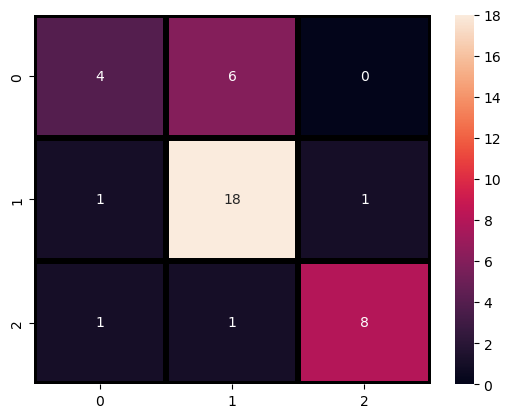

In [103]:
sns.heatmap(confusion_matrix(test_y,predict_output),annot=True,fmt='d',linecolor='k',linewidths=3)


In [104]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:

Accuracy Score:99.64%
 
Classification Report:
              0           1          2  accuracy   macro avg  weighted avg
precision   1.0    0.992857   1.000000  0.996429    0.997619      0.996454
recall      1.0    1.000000   0.985714  0.996429    0.995238      0.996429
f1-score    1.0    0.996416   0.992806  0.996429    0.996407      0.996422
support    71.0  139.000000  70.000000  0.996429  280.000000    280.000000
 
Confusion Matrix:
[[ 71   0   0]
 [  0 139   0]
 [  0   1  69]]

Test Result:

Accuracy Score:59.17%
 
Classification Report:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.666667   0.586207   0.531250  0.591667    0.594708      0.593253
recall      0.645161   0.576271   0.566667  0.591667    0.596033      0.591667
f1-s

In [105]:
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.5428571428571428


In [106]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Awadhesh pal\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Awadhesh pal\anaconda3\

In [107]:
grid.best_score_

0.5964285714285714

In [108]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.55

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        31
           1       0.55      0.58      0.56        59
           2       0.36      0.30      0.33        30

    accuracy                           0.55       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.54      0.55      0.54       120



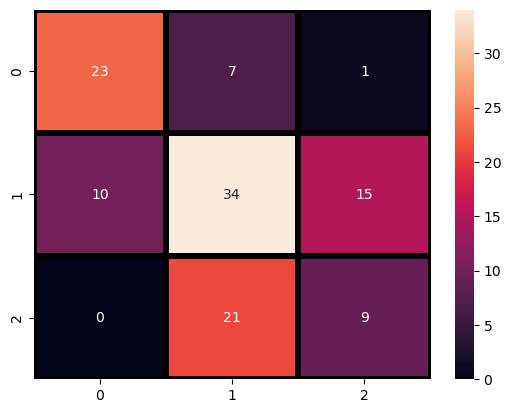

In [109]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

## Using Smote based Techniques

In [110]:
x= model_data.drop(['Sales'],axis=1)
y=model_data['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0,stratify=y)


In [111]:
print('Shape of X_train:',x_train.shape)
print('Shape of X_test', x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train: (280, 8)
Shape of X_test (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 139, 0: 71, 2: 70})
After Counter({1: 139, 2: 139, 0: 139})


In [116]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [117]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

NameError: name 'sampled_data' is not defined

In [119]:
from imblearn.combine import SMOTETomek, SMOTEENN

In [120]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1: 198, 0: 102, 2: 100})
After Counter({2: 184, 0: 178, 1: 172})


In [124]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
conuter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({2: 184, 0: 178, 1: 172})
After Counter({2: 184, 0: 178, 1: 172})
Shape of X_train:  (373, 8)
Shape of X_test:  (161, 8)
Shape of y_train:  (373,)
Shape of y_test (161,)


In [125]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

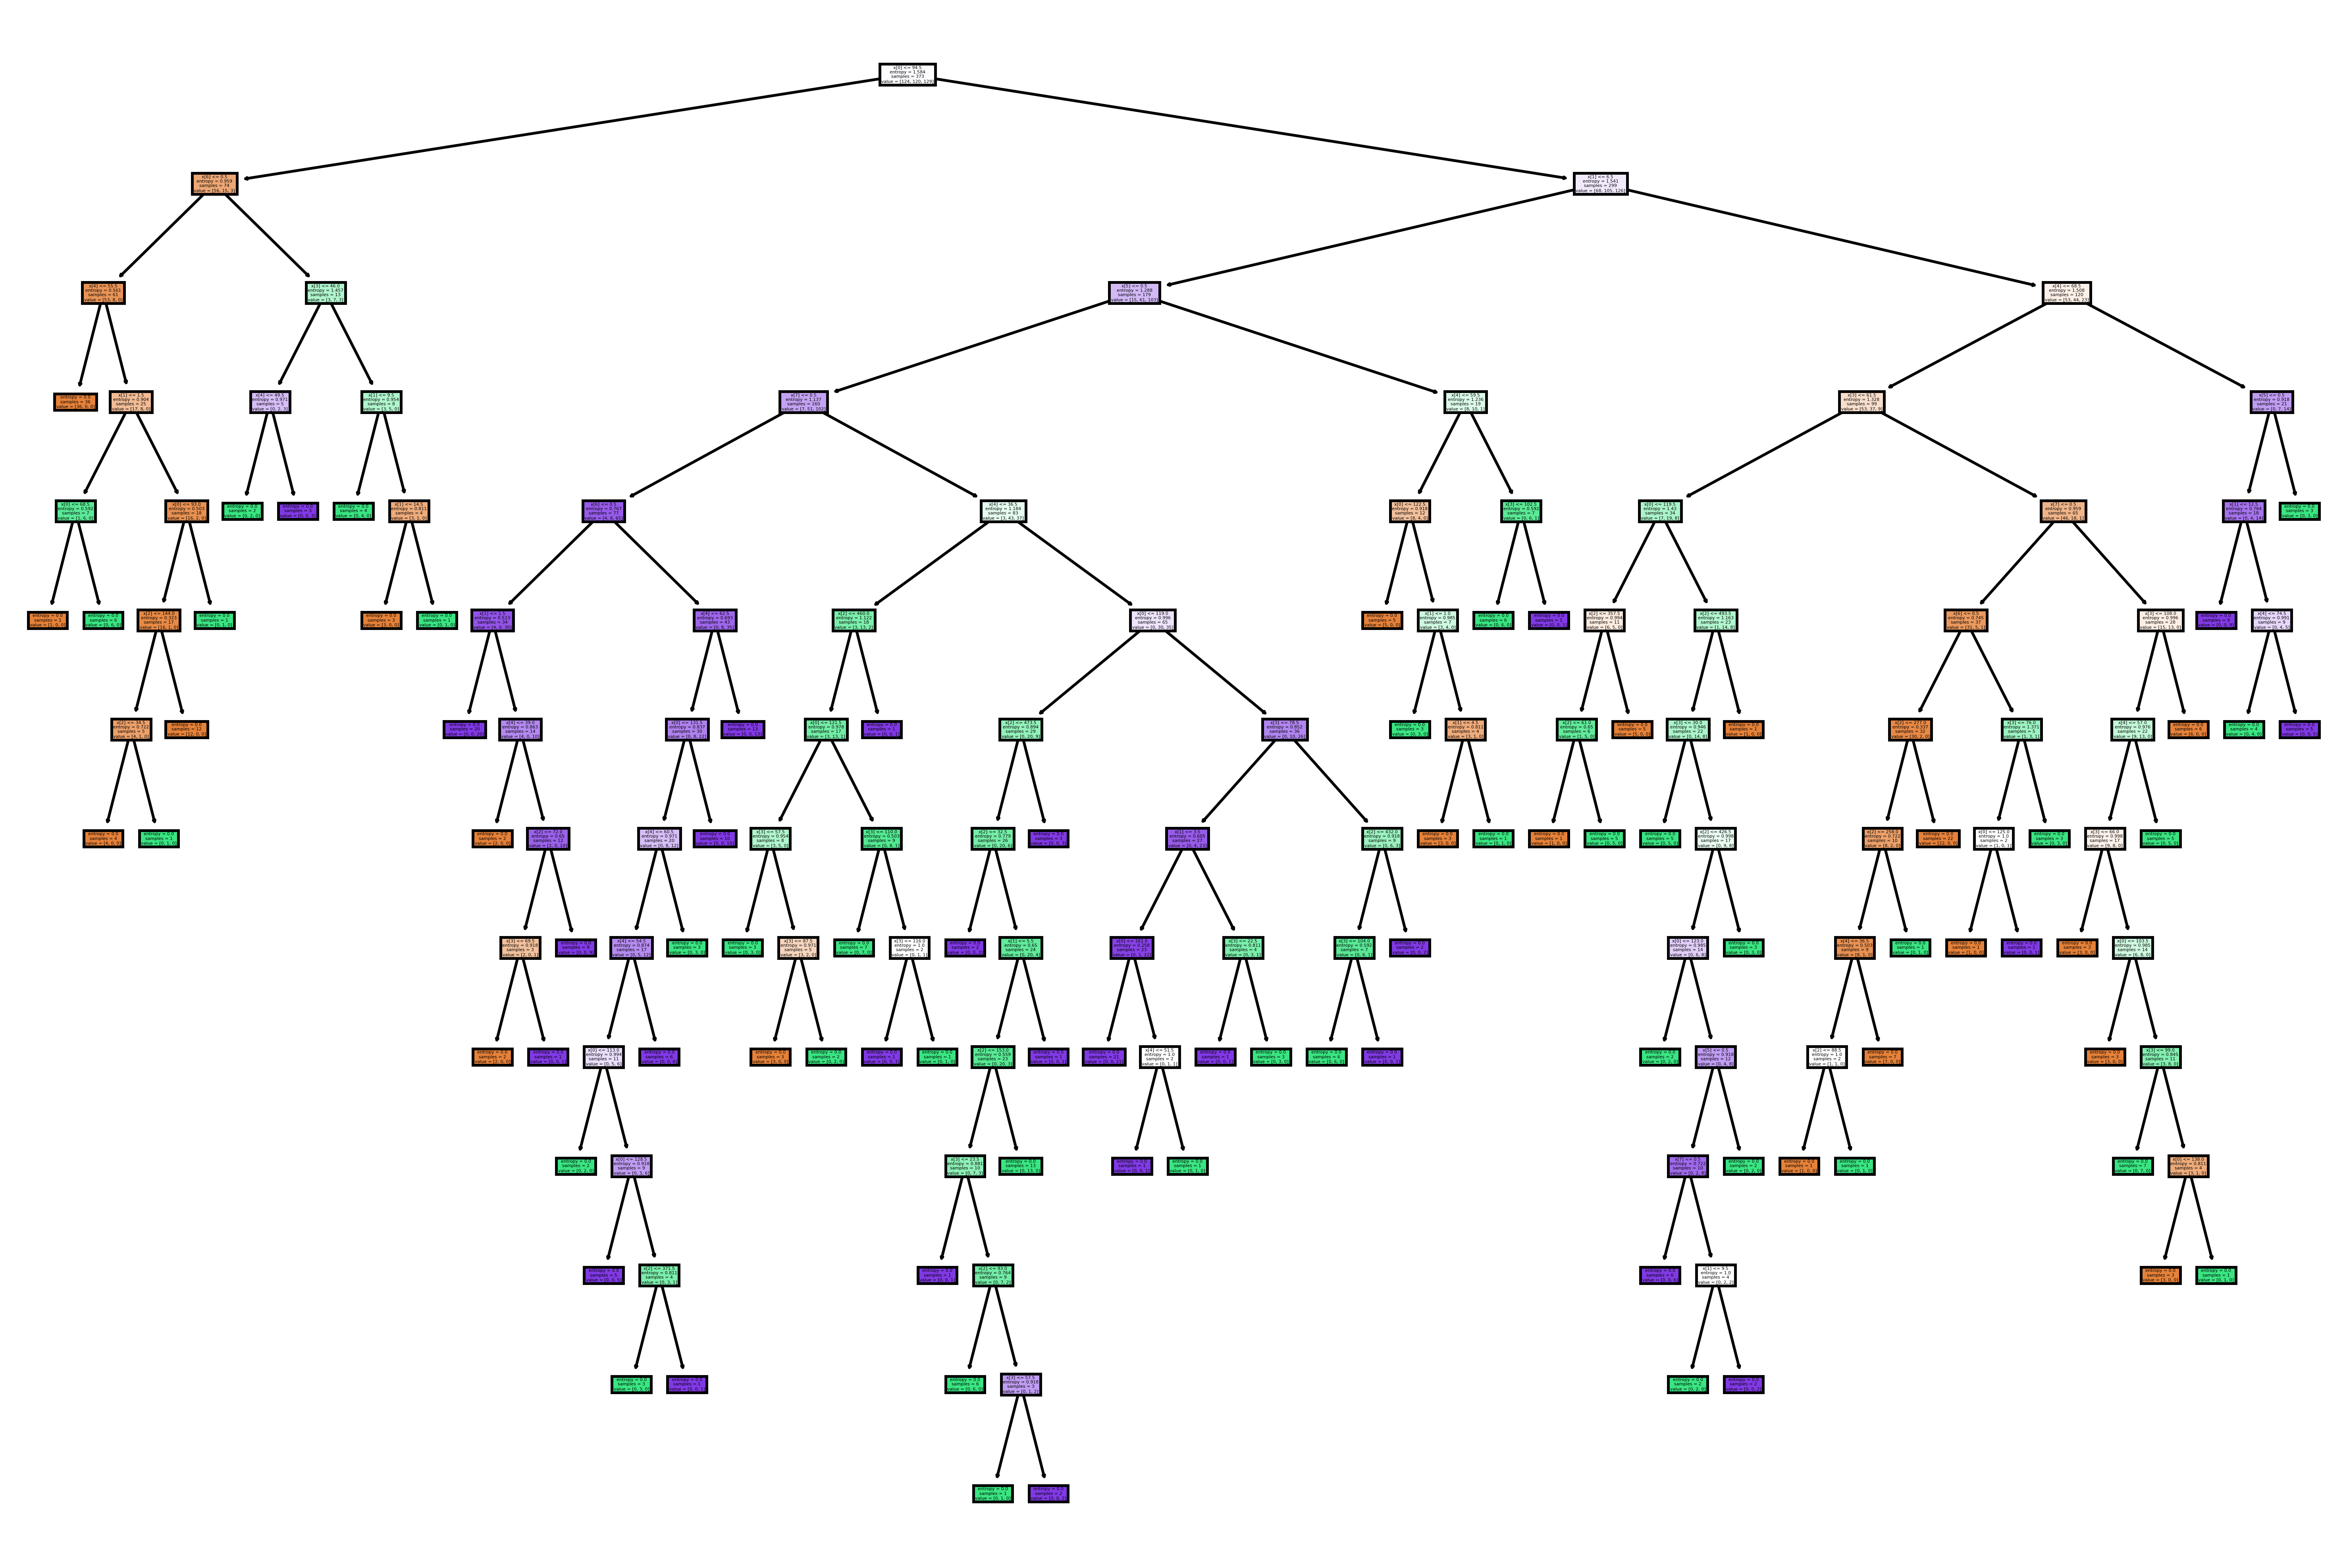

In [126]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [127]:
# Predicting on test data 
preds = model_entropy.predict(x_test)
pd.Series(preds).value_counts()

2    60
1    55
0    46
dtype: int64

In [128]:
pd.crosstab(y_test,preds)

col_0   0   1   2
Sales            
0      34  17   3
1      10  25  17
2       2  13  40

In [129]:
np.mean(preds==y_test)

0.6149068322981367

In [131]:
# Classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        54
           1       0.45      0.48      0.47        52
           2       0.67      0.73      0.70        55

    accuracy                           0.61       161
   macro avg       0.62      0.61      0.61       161
weighted avg       0.62      0.61      0.62       161



In [132]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [133]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15852529328500253


In [134]:
ccp_alphas

array([0.        , 0.00536193, 0.00536193, 0.00536193, 0.00536193,
       0.00678103, 0.00678103, 0.00721168, 0.00735505, 0.00738576,
       0.00738576, 0.00812067, 0.00870003, 0.00870003, 0.00870003,
       0.00870003, 0.00870003, 0.00909252, 0.0090987 , 0.00957582,
       0.00958177, 0.0097895 , 0.01023522, 0.01030727, 0.01031363,
       0.01045612, 0.01051835, 0.01054807, 0.01076843, 0.01105349,
       0.01107864, 0.01110378, 0.01110378, 0.0117704 , 0.01221672,
       0.01222878, 0.01250015, 0.01250509, 0.01301542, 0.01301542,
       0.01392154, 0.0151487 , 0.01523681, 0.01591   , 0.01722361,
       0.01723343, 0.01730357, 0.01775118, 0.01885844, 0.02177516,
       0.02233266, 0.02247521, 0.02522568, 0.02932531, 0.0308771 ,
       0.03106074, 0.03585495, 0.04769377, 0.05502516, 0.06593311,
       0.06715243, 0.08112208, 0.13241467, 0.15852529])

###  Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [135]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.03366643)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03366643, criterion='entropy',
                       random_state=0)

In [136]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.7024128686327078 
Testing Accuracy 0.6211180124223602


In [138]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65        54
           1       0.47      0.37      0.41        52
           2       0.68      0.84      0.75        55

    accuracy                           0.62       161
   macro avg       0.60      0.62      0.61       161
weighted avg       0.61      0.62      0.61       161



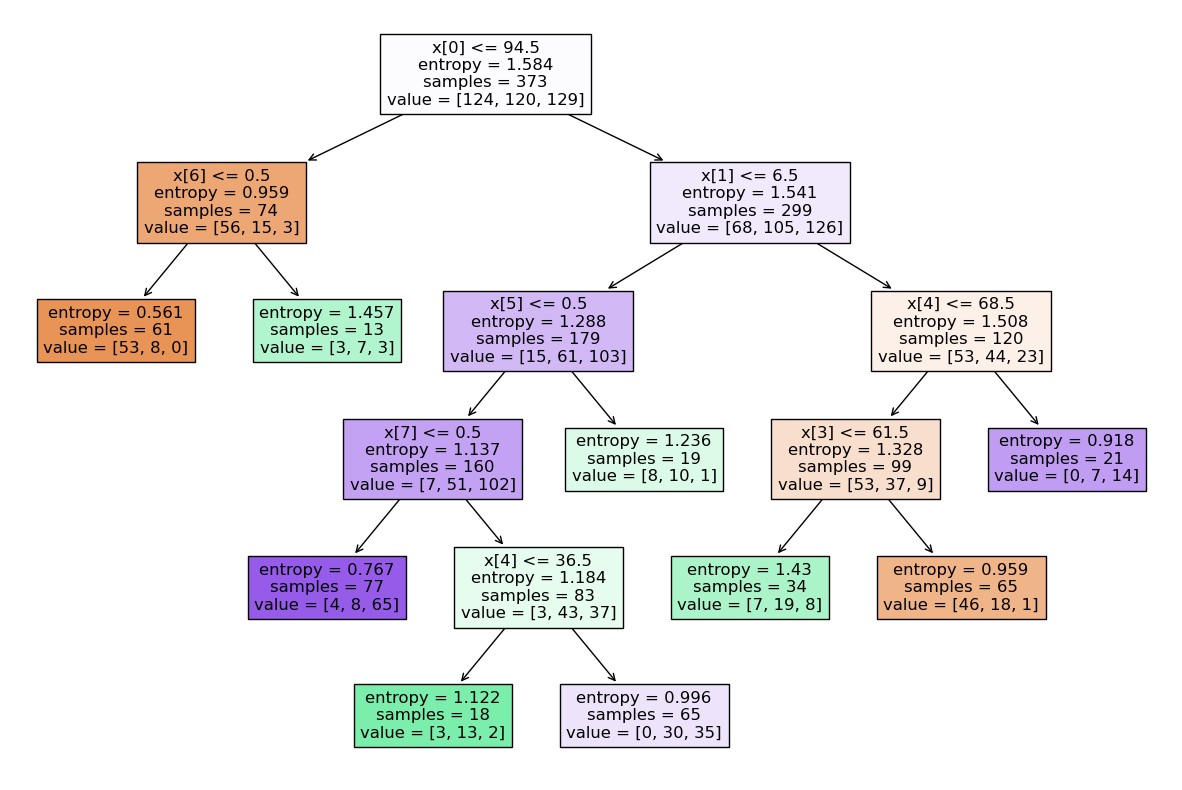

In [139]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning¶

In [140]:
model_gini  = DecisionTreeClassifier(criterion='gini',random_state=0)
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

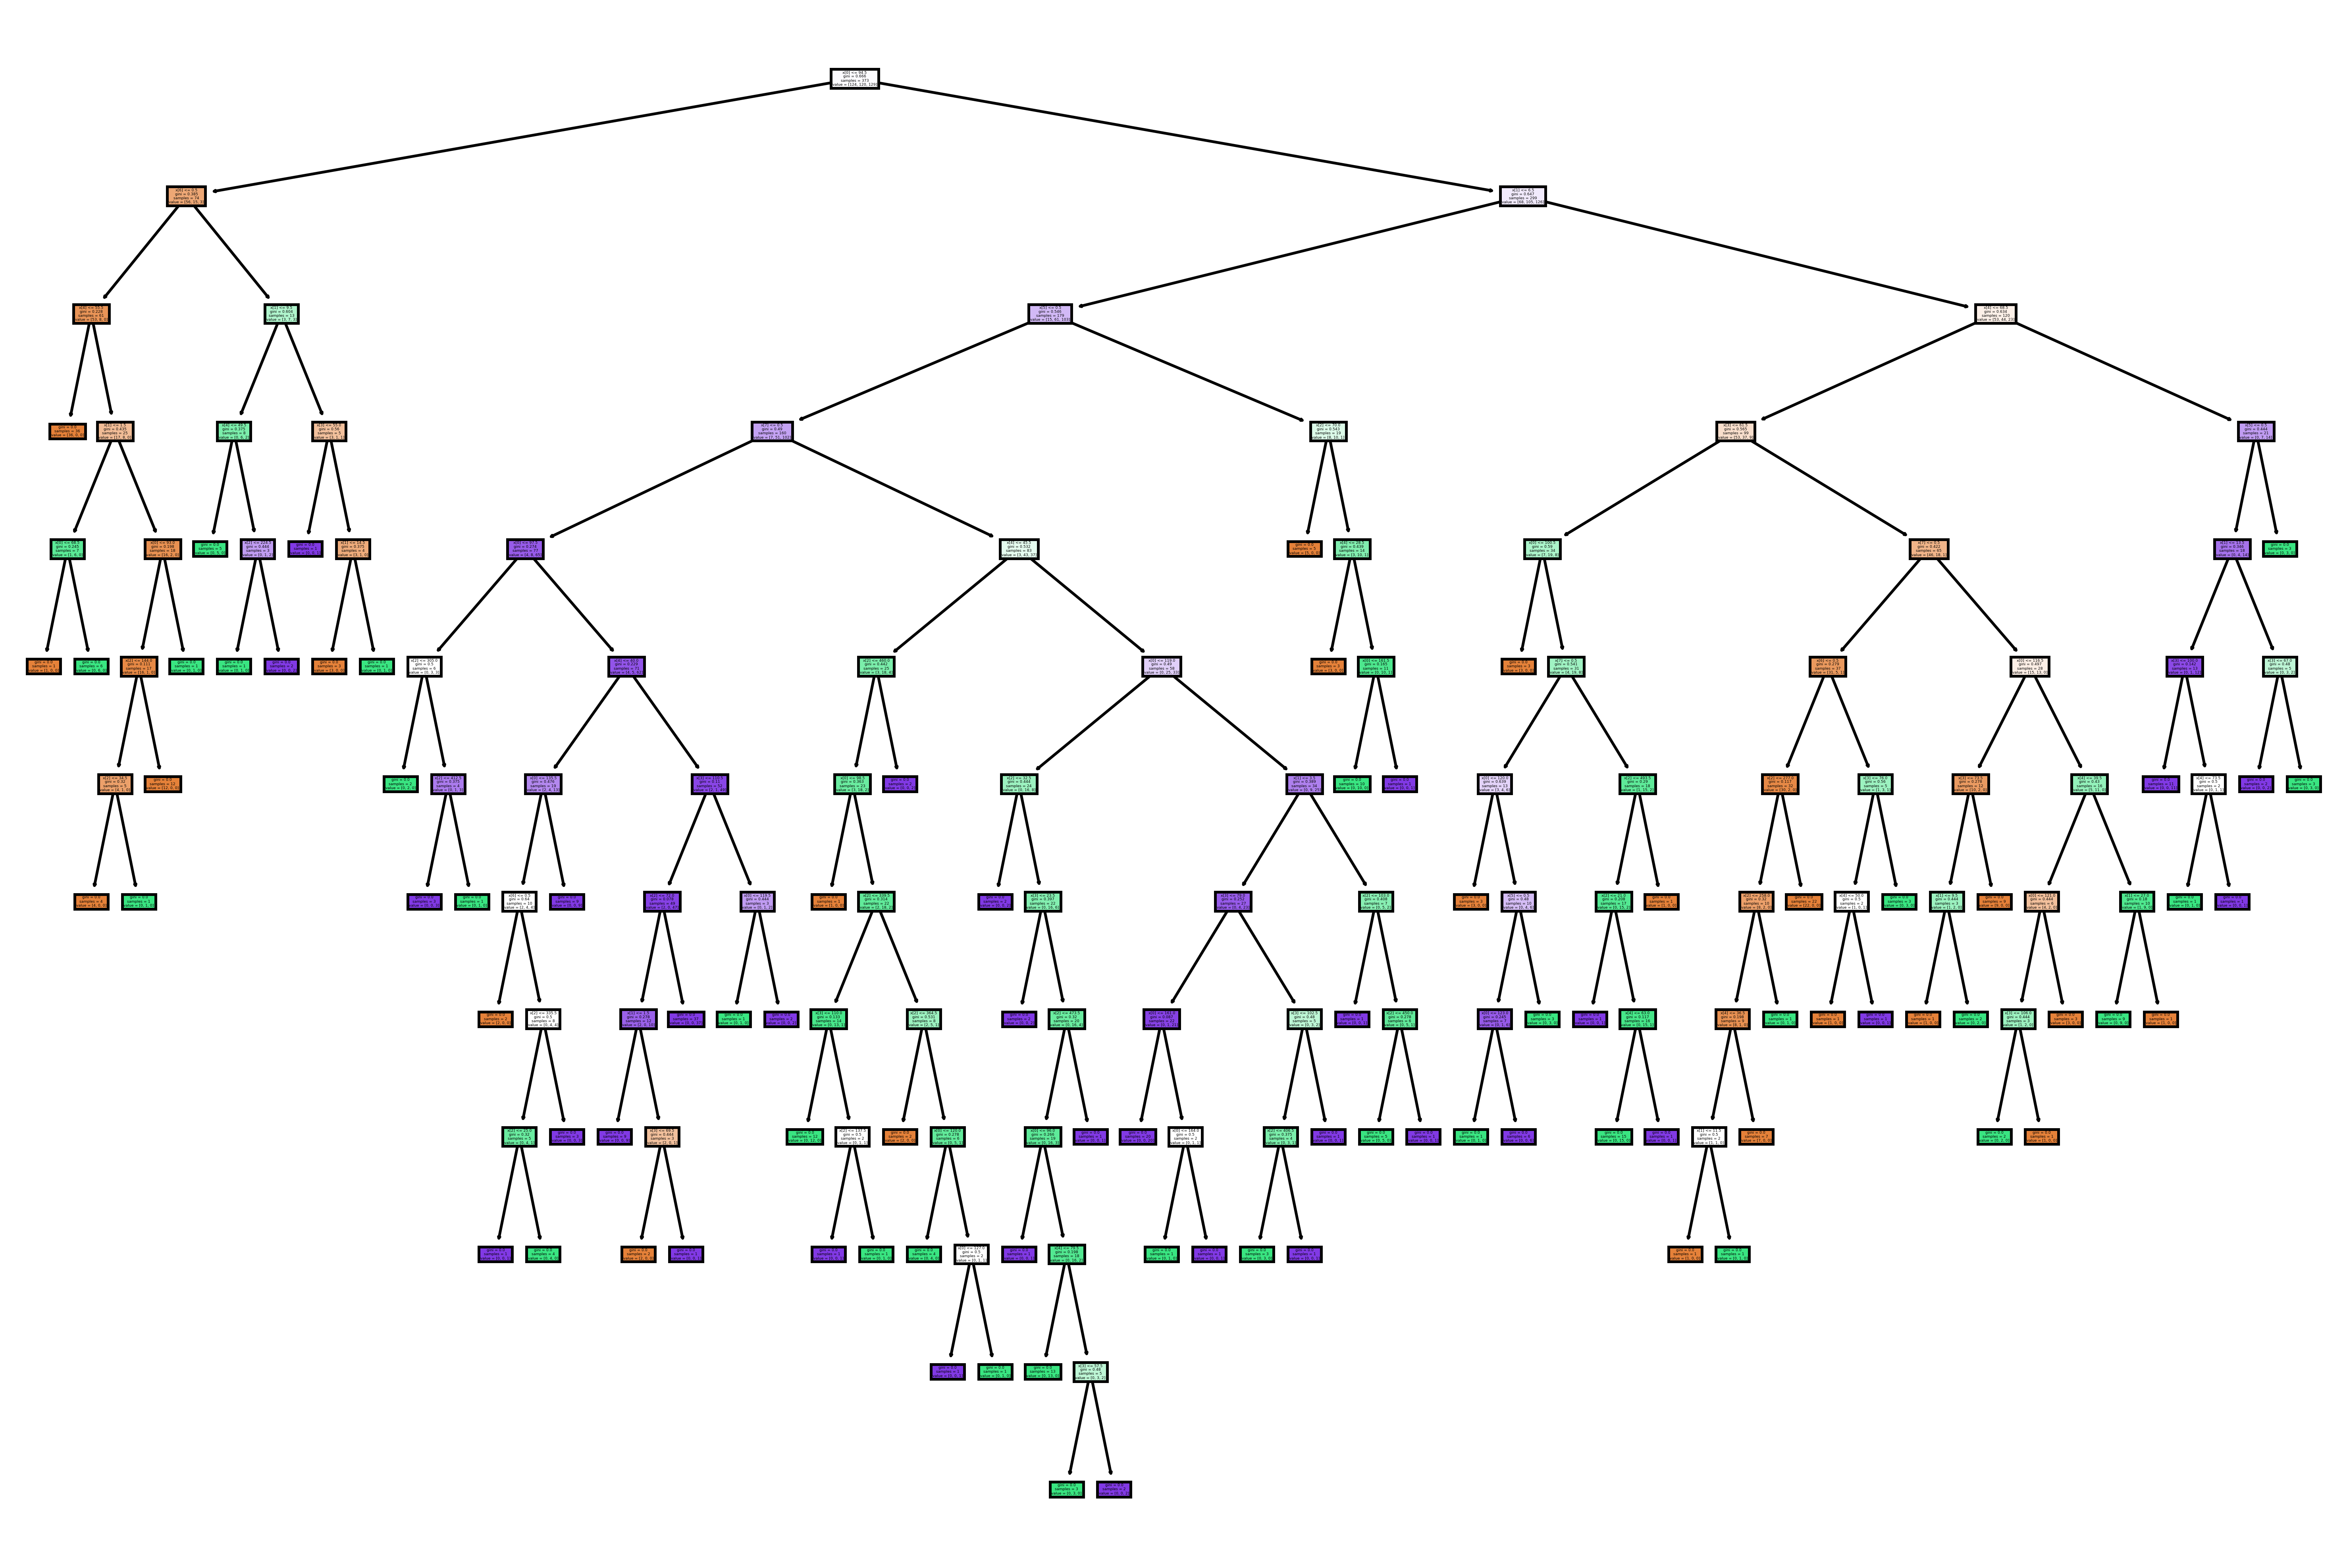

In [141]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [142]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() 

2    58
1    56
0    47
dtype: int64

In [144]:
pd.crosstab(y_test,preds)

col_0   0   1   2
Sales            
0      35  15   4
1      11  29  12
2       1  12  42

In [145]:
# Accuracy 
np.mean(preds==y_test)

0.6583850931677019

In [146]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        54
           1       0.52      0.56      0.54        52
           2       0.72      0.76      0.74        55

    accuracy                           0.66       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.66      0.66      0.66       161



In [147]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [148]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07113395147427992


In [149]:
ccp_alphas

array([0.        , 0.00223414, 0.00238308, 0.00247474, 0.00248947,
       0.00252326, 0.0025591 , 0.00264373, 0.00268097, 0.0030728 ,
       0.00321716, 0.00357462, 0.00357462, 0.00357462, 0.00375335,
       0.00382995, 0.00402145, 0.00428954, 0.00428954, 0.00431101,
       0.00446828, 0.0044858 , 0.00459594, 0.00459594, 0.00466687,
       0.00482574, 0.00482574, 0.00487448, 0.00536193, 0.00548567,
       0.00571939, 0.00576951, 0.00586604, 0.00645666, 0.00671776,
       0.00721762, 0.00827269, 0.00834078, 0.00896926, 0.00955122,
       0.00955318, 0.01139089, 0.01157077, 0.01218851, 0.01241878,
       0.01799374, 0.0227207 , 0.02878517, 0.02970505, 0.05315836,
       0.07113395])

### Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [151]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.02970505)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02970505, random_state=0)

In [152]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6085790884718498 
Testing Accuracy 0.5900621118012422


In [153]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.56      0.93      0.69        54
           1       0.48      0.38      0.43        52
           2       0.86      0.45      0.60        55

    accuracy                           0.59       161
   macro avg       0.63      0.59      0.57       161
weighted avg       0.63      0.59      0.57       161



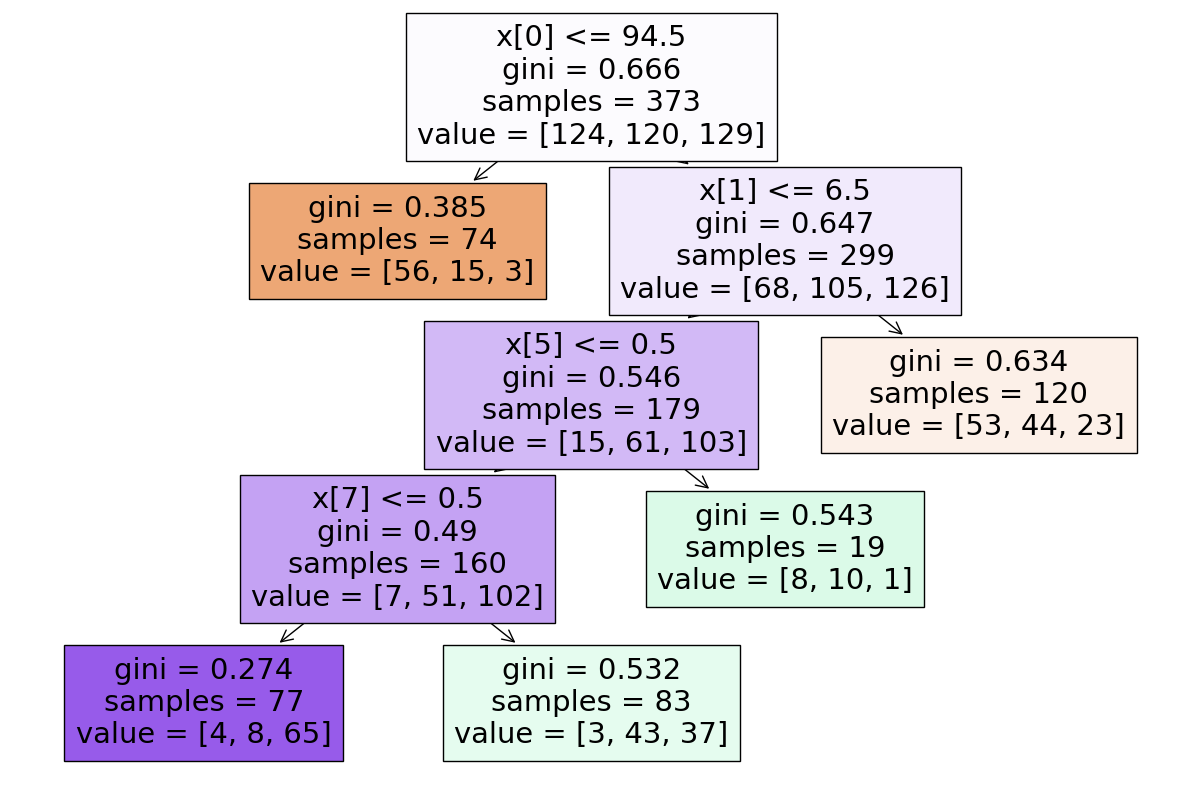

In [154]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()